# Car Price Prediction with Machine Learning

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load Dataset (Replace 'car_data.csv' with actual dataset file)
df = pd.read_csv('car_data.csv')

In [4]:
# Display first few rows
display(df.head())

,brand,model,year,mileage,engine_size,horsepower,fuel_type,transmission,price
0,Toyota,Corolla,2018,30000,1.8,132,Petrol,Automatic,20000
1,Honda,Civic,2019,25000,2.0,158,Petrol,Manual,22000
2,Ford,Mustang,2020,20000,3.5,310,Petrol,Automatic,35000
3,BMW,X5,2017,40000,3.0,300,Diesel,Automatic,45000
4,Audi,A4,2021,15000,2.0,190,Petrol,Manual,40000


In [5]:
# Handling Missing Values
df.dropna(inplace=True)

In [6]:
# Selecting relevant features
categorical_features = ['brand', 'model', 'fuel_type', 'transmission']
numerical_features = ['year', 'mileage', 'engine_size', 'horsepower']

In [9]:
# Encoding categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_features)

In [10]:
# Scaling numerical features
scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

In [11]:
# Combining processed features
X = pd.concat([numerical_scaled, categorical_encoded], axis=1)
y = df['price']  # Target variable


In [12]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Model Prediction
y_pred = model.predict(X_test)

In [15]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 4115.0
MSE: 18198850.0
R² Score: -71.7954


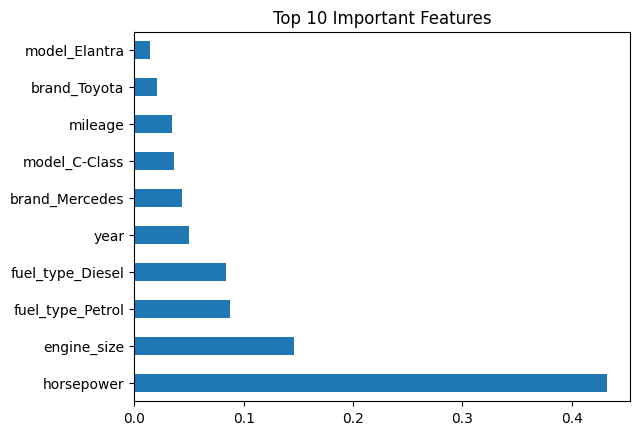

In [17]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()